<p style="text-align:left;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie3.png" alt="Drawing" style="width: 250px;"/></p>

<h1 style='text-align: center;'> Natural Language Processing </h1>
<a href='https://github.com/javierjevf'><h4 style='text-align: center;'> Javier Vázquez</h4> </a>

<p style="text-align:right;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie1.png" alt="Drawing" style="width: 250px;"/></p>

## Objectives:

1. Working with the IMDB's review dataset.
2. Use NLTK tools and Pandas to extract relevant information from the database.
3. Create visualizations to explore data and provide useful insight.
4. Train a model to classify a review (or a text related to movies) into a positive or negative class.
5. Improve model efficiency using a word tokenization approach.
6. Train a TF-IDF model with the tokens implementation.
7. Implement sentiment analysis methodology.




## Loading requirements

In this project, which kind off seems like my personal notes on *Natural Languaje Processing*, I will be using the IMDB Dataset found on Kaggle. For further informaton on this please be sure to hop in: <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>. The dataset consists on roughly 50 thousand reviews gathered from IMDB. 

The first step is to sort out our *data*. In this case, it consists on finding out the best way to represent a text review, so that the Machine Learning algorithm can interpret it better and work with that representation mathematically. The libraries I'll be using the most are: Pandas to handle and wrangle the data, Pyplot and Seaborn for visualizations, Numpy for out math-related needs, NLTK for text analysis and feature extraction and SciKit Learn for the Machine Learning and some text processing algorithms. 

Lets load the data and apply some pre-processing to the text. Mainly, the idea is to remove markers that may cause unnecessary noise on the classification or analysis. Right now let's remove punctuation marks and convert every single character into lower case. Afterwards we will remove every word which doesn't add any value to the bag of words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import  WordCloud
from PIL import Image
import pickle
import string
import nltk 
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# nltk.download('averaged_perceptron_tagger')


%matplotlib inline
sns.set_style("darkgrid")

# Loading the original database
movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    return nopunc

movies["review_nopunc"] = movies.review.apply(text_process)
movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

# movies = pd.read_csv("clean_movies_database.csv",index_col=False)#.drop(["review","review_nopunc"],axis=1)
# movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

## EDA

This is the first approach to understand the datain our hands. We can count the number of reviews labeled as positive and negative to get a broad idea of how evenly distributed the set is. 

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


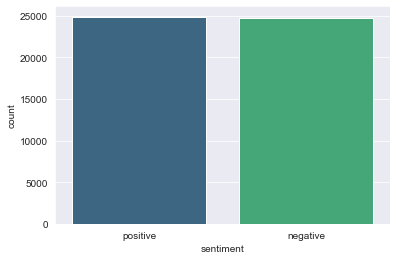

In [2]:
print(sns.countplot(data=movies.sentiment,x=movies.sentiment,palette="viridis"))
print(movies.sentiment.value_counts())

From the last computation it can be gathered that the database is very balanced between positive and negative labels. This is great because it means that it won't be an issue to even things out among the classes we're sorting out. And it is also very ncie to have pre-labeled data as it won't be necessary to develop any algorithm to get more information out of the text.

<AxesSubplot:ylabel='Frequency'>

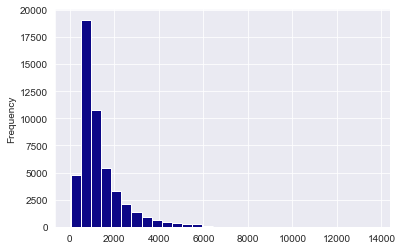

In [3]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist",colormap="plasma")

<AxesSubplot:xlabel='sentiment', ylabel='review'>

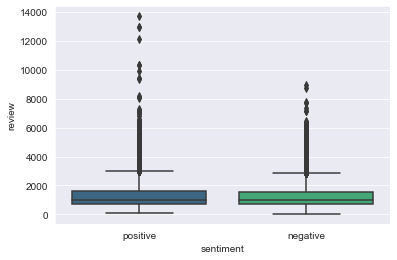

In [4]:
sns.boxplot(data=movies,x="sentiment",y=movies.review.apply(len),palette="viridis")

In [5]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

After very little feature engineering, (which is a fancy way to say we did some computations over the text) we can extract the length of every review and assign it to every review. With this we're able to  tell that most messages' length range from 340 to 2301 characters. There are significant outliers to this, but the mean length of the messages is 1310. 

## Lemmatization

There are many different ways to pre-process the data. One of the first steps taken on this dataset was removing stopwords and some punctuation marks. Lemmatization is an algorithm which will take in a word and assign it to its root, or *lemma*. This is very similar to stemming, which is the process of removing suffixes and prefixes to get the "raw" base of the word, also called a *stem*.

This is a bit more complex than my over-simplification above, but the result may vary depending on which kind of lemma you want to align the bag of words to. You may either lemmatize to nouns, adjectives or verbs, which means that some words will be switched to the infinitive form if its a verb, plural and some suffixes if its a noun and simplify the adjectives. Using a lemmatizer may provide a different result depending on the project than other techniques, but the best thing about using it, is that it returns an actual word. Thus, it will be simpler and cleaner to interpret it.  

Let's create a simple list that will act as a bag of words lemmatized to verbs:

In [10]:
lemmatizer = WordNetLemmatizer()

bag_of_verbs = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="v")
        bag_of_verbs.append(word)

print(bag_of_verbs[:10])

KeyError: 3537

In [ ]:
c_v = Counter(bag_of_verbs)
print(c_v.most_common(20))
print(len(c_v))

## Training a model.

 This will be a **SVM Classifier** trained on half the data set. Lemmatization is very useful on the text preprocessing for building a model, for the sake of the exercise, I'll work with the bag of words made out of verbs. 

 More information can be found on this subject on SciKit-Learn's own documentation on **Support Vector Machines** and a great explanation of this subject can be found here: <https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/>

In [ ]:
# Importing from SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")

['one', 'reviewers', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right']
[('br', 112957), ('film', 91438), ('movie', 82849), ('one', 50640), ('make', 43692), ('like', 42733), ('see', 40409), ('get', 34923), ('time', 29497), ('good', 28369), ('character', 27370), ('watch', 27003), ('go', 26734), ('even', 24833), ('would', 23826), ('think', 23796), ('really', 22778), ('story', 21948), ('show', 21160), ('well', 19159)]
168339
Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    1.0

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      2494
    positive       0.85      0.84      0.85      2506

    accuracy                       

## Fitting a model and evaluation.

In [ ]:
model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

## Validation testing

In [ ]:

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")


In [ ]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     12212
    positive       0.86      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



## Sources

SciKitLearn 

    https://scikit-learn.org/stable/modules/svm.html#svm-classification

    KG:     https://www.youtube.com/watch?v=M9Itm95JzL0   (watched this completely)
    KG:     https://www.youtube.com/watch?v=vyOgWhwUmec
    FCC:    https://www.youtube.com/watch?v=X2vAabgKiuM
    DS:     https://www.youtube.com/watch?v=hHr_cBKkRfQ
    SDX:    https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL
    PyO:    https://www.youtube.com/watch?v=xvqsFTUsOmc

    https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html
